# **Praca domowa 5**
## **Opis**
#### Celem zadania jest przetestowanie różnych sposobów klasteryzacji na zbiorze punktów w przestrzeni 2 wymiarowej. Dwóm techinkom klasteryzacji toważyszą unikatowa metoda wyboru optymalnej liczby klastrów, następnie pokazuje dodatkowe techniki.

### **Struktura pliku**
1. **Prezentacja danych**
2. **Agglomerative Clustering**
    1. Hierarchiczna klasteryzacja
3. **Spectral Clustering**
    1. Metoda Silhouettea
4. **Dodatkowe algorytmy**
    1. DBSCAN
    2. K-Means
    3. Birch

### **Załadowanie używanych bibliotek**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, KMeans, Birch
from scipy.cluster import hierarchy

## **Prezentacja danych**

**Załadowanie danych**

In [23]:
data = pd.read_csv("../clustering.csv",header = None)
data.columns = ["x","y"]

In [3]:
data.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


### **Naniesienie punktów**

Text(0.5, 1.0, 'Punkty')

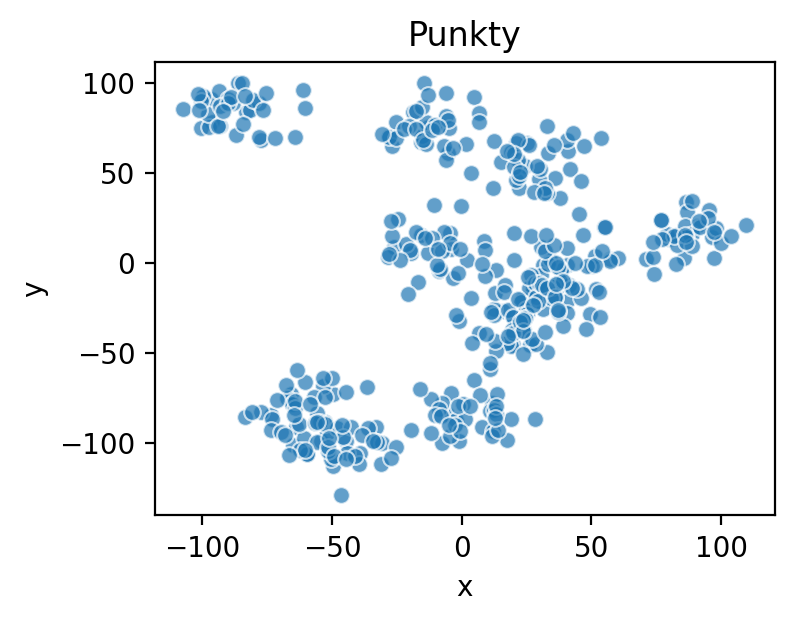

In [4]:
plt.figure(figsize=(4, 3), dpi= 200, facecolor='w', edgecolor='k')
sn.scatterplot(x=data["x"],y=data["y"],alpha=0.7)
plt.title("Punkty")

### Komentarz
Jak widać nie wszystkie grupy widocznie się odróżniają, kwestią sporną może być to dokładna ilość klastrów. Szczególnie jest to widoczne dla środkowej cześci wykresu, gdzie teoretycznie mamy jedną dużą grupę jednak, gdybyśmy by wszystkie klasrty miały ten sam "rozmiar", trzebaby go podzielić na 3 mniejsze i zgaduje, że dokładnie tak postąpią algorytmy. 

## **Wybór algorytmów** 
Na stronie [scikit-learn](https://scikit-learn.org/stable/modules/clustering.html) istnieje taka wspaniała grafika, która obrazuje działanie różnych algorytmów w różnych sytuacjach. Oczywiście wrzuciłem go dlatego, że ten dokument może przeglądać osoba nie znająca tych najbardziej popularnych algorytmów, nie dlatego że sam ich nie znam i nie wiem jak działają. Nie, absolutnie nie o to chodzi. 

![](img.png)

Wiedząc, już z jakiego typu danymi mam do czynienia mogę świadomie wybrać `Agglomerative clustering` oraz `Spectral clustering`. Wybieram te algorytmy nie dlatego, że spodziewam się, że będą osiągały najlepsze wyniki, lecz dlatego, że chce się dokładniej przyjżeć ich działaniu i różnicom między nimi.

## **Funkcje pomocnicze** 

#### **Rysowanie dendrogramu klasteryzacji hierarhicznej**

In [5]:
def show_cluster_dendrogram(X,title,y_line=None):
    Z = hierarchy.linkage(X, method='average')
    plt.figure(figsize=(4, 3), dpi= 200, facecolor='w', edgecolor='k')
    hierarchy.dendrogram(Z)
    plt.xticks(labels=None)
    plt.title(title)
    if y_line:
        plt.axhline(y_line, color="purple")
    plt.show()

#### **Tworzenie klastrów daną metodą i ich wizualizacja**

In [6]:
def cluster_and_show(X,model,plot_title):
    y = model.fit_predict(X)
    plt.figure(figsize=(4, 3), dpi= 200, facecolor='w', edgecolor='k')
    plt.scatter(X["x"], X["y"], c=y, s=30, cmap='viridis')
    plt.title(plot_title)
    plt.show()

#### **Metoda Slhouetta**

In [7]:
def calculate_silhouette(X, method, min_nr=2,max_nr=15):
    resoults = []
    for i in range(min_nr,max_nr+1):
        model = method(n_clusters=i, random_state=0,affinity='nearest_neighbors')
        predictions = model.fit_predict(X)
        resoults.append(silhouette_score(X,predictions))
    return resoults

## **Agglomerative clustering**
W tym paragrafie przedstawię agglomeratywne podejście do klasteryzacji, najpierw jednak muszę dowiedzieć się jakiej ilości klustrów chce szukać. W tym celu posłuże się wcześniej zdefiniowaną funkcją do rysowania dendrogramów. Które to są budowane przez łaczenie po kolei najbliższych punktów, a później zbiorów punktów. Poziomymi kreskami sa przedstawione na wykresie maksymalne odległości dwóch punktów w danym zbiorze. Tak więc ucinając nasz dendrogram linią na pewnym poziomie `Y` moge powiedzieć, że połaczenia poniżej lini przedstawiają klastry, w których żadne punkty nie są od siebie oddalone o więcej niż `Y`.

#### Zobaczmy jak to wygląda dla naszego zbioru

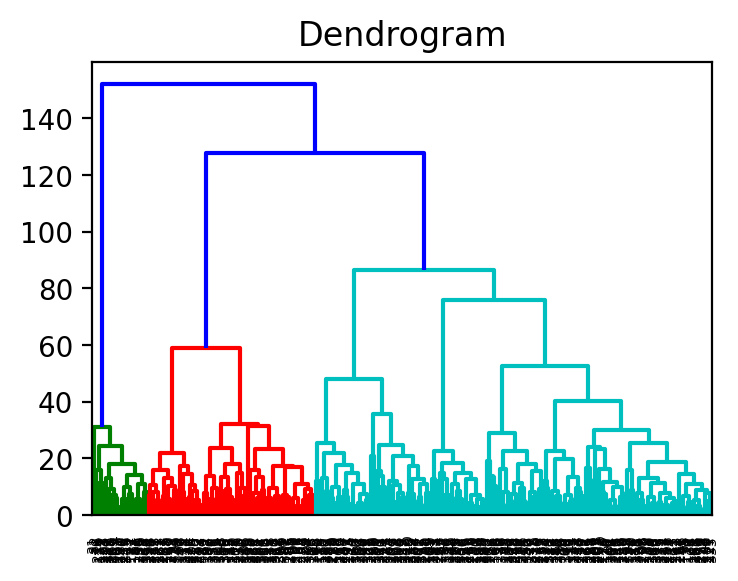

In [8]:
show_cluster_dendrogram(data,"Dendrogram")

#### **Komentarz** 
Kwestię jak najlepiej jest przycinać drzewa pozostawmy ogrodnikom i doktorom data science. Ja bez większego uzasadnienia uważam, że wystarczająco dobrym przycięciem drzewa będzie `Y=38`. Zobaczmy jak to wygląda.

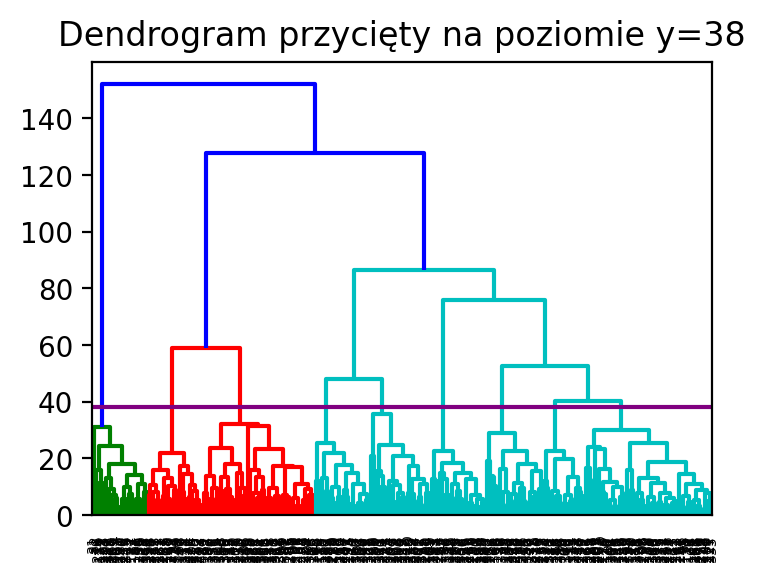

In [9]:
show_cluster_dendrogram(data,"Dendrogram przycięty na poziomie y=38",38)

#### **Jak policzyć ilośc klastrów?** 
Wystarczy policzyć ilośc pionowych krawędzi przechodzących przez naszą poziomą linię. W takim razie

In [10]:
nr_of_clusters = 9

### **A teraz przejdźmy do agglomeratywnej klasteryzacji**

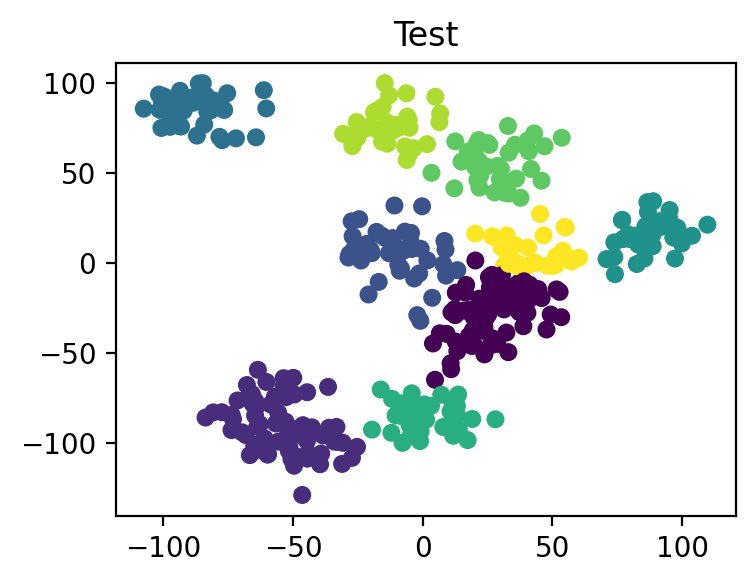

In [11]:
model = AgglomerativeClustering(n_clusters=nr_of_clusters)
cluster_and_show(data,model,"Test")

### **Wnioski**
Jestem pozytywnie zaskoczony wynikami, ponieważ oceniając wizualnie wykres wydaje się, że trafnie oszacowałem liczbę klastrów, a algorytm klasteryzacji dobrze sobie poradził. Jednakże nie podoba mi się, że liczbę klastrów wybierałem "na oko", chiciałbym żeby moje wyniki miały mocniejszą podstawę matematyczną. Spróbuję wiec osiągnąć ten cel testując następny algorytm klasteryzacji.

## **Spectral clustering**
Chce ponownie spróbować oszacować liczbę klastrów, teraz jednak podchodząc do tego bardziej matematycznie, dlatego wykorzystam do tego Metodę Silhouettea.

**Jakie wyniki daje metoda?**

In [12]:
warnings.filterwarnings('ignore') # to scilence warinings
value = calculate_silhouette(data,SpectralClustering)

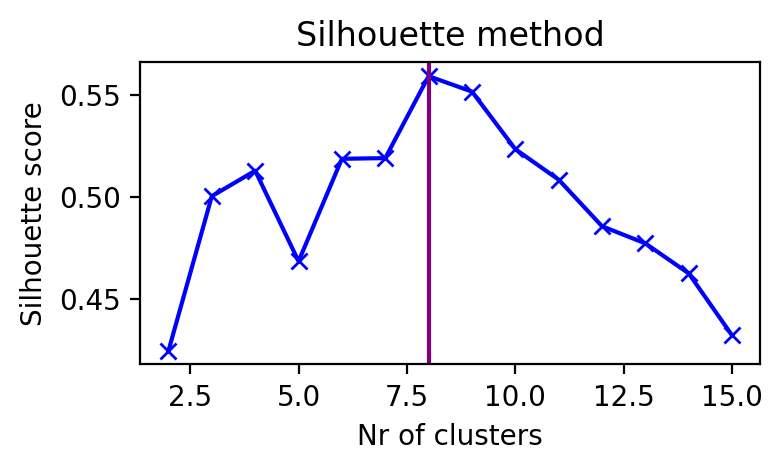

In [13]:
plt.figure(figsize=(4, 2), dpi= 200, facecolor='w', edgecolor='k')
plt.plot(range(2,16), value, 'bx-')
plt.xlabel('Nr of clusters')
plt.ylabel('Silhouette score')
plt.axvline(8, color = "purple")
plt.title("Silhouette method")
plt.show()

### Komentarz
Widzimy, że metoda szacuje ilość klastrów na 8 lub 9, lecz my wybierzemy 9. Robię to by móc porównać różnice pomiędzy wynikami działania algorytmów.

In [14]:
nr_of_clusters = 9

### **A teraz przejdźmy do spektralnej klasteryzacji**

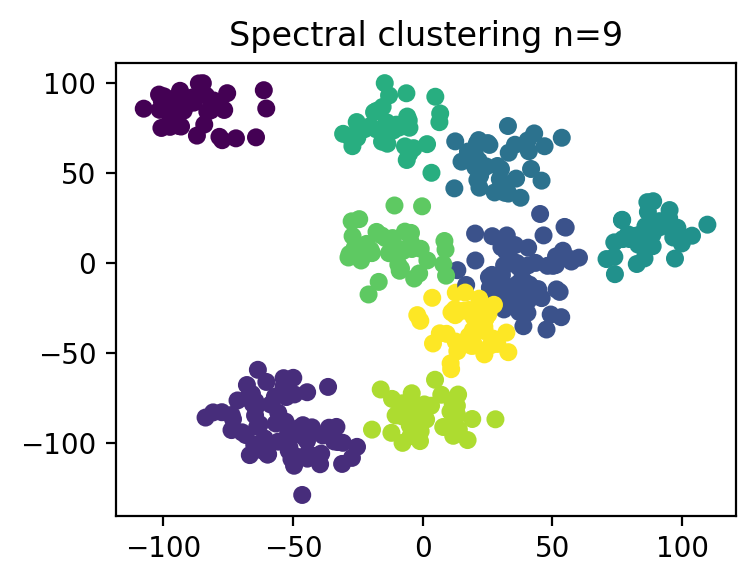

In [15]:
model = SpectralClustering(n_clusters=nr_of_clusters, affinity="nearest_neighbors")
cluster_and_show(data,model,f"Spectral clustering n={nr_of_clusters}")

#### **Porównanie**

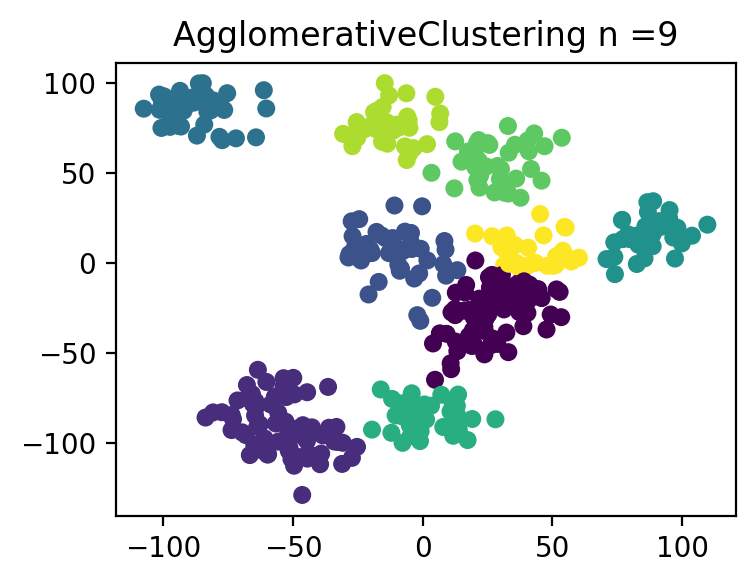

In [16]:
model = AgglomerativeClustering(n_clusters=nr_of_clusters)
cluster_and_show(data,model,f"AgglomerativeClustering n ={nr_of_clusters}")

### **Komentarz**

Okazuje się, że w nefraligicznych punktach, gdzie klustry są blisko siebie możemy się spodziewać różnych wyników. Jedna z grup w `AgglomerativeClustering` jest zedcydowanie mniej liczna niż jej reprezentant w `SpectralClustering`. Ma to swoje plusy i minusy. Oznacza to, że obie metody nie są idealne i nie można wybrać którejkolwiek by uzyskać najlepszy wynik, natomiast są różnice w ich działaniu i możemy wybrać taki algorytm, który będzie tworzył klastry w sposób dla nas najbardziej pożądany. 

## **Testowanie innych algorytmów**
Chce tu na szybko pokazać i samemu zobaczyć działanie innych algorytmów, tych bardziej zaawansowanych jak i tych raczej średnio nadających się do tego typu problemu. 

#### **DBSCAN**
O ile uznaje ten algorytm za bardziej zaawansowany i z pewnością użyteczny, tak jest tu problem z opytmalnym ustawieniem maksymalnej odległości pomiędzy sąsiadami, czyli `eps`. Możnaby dostroić hiperparametry by działał on lepiej, jednak ja się skupie na `eps` i ustawię je na 9. 

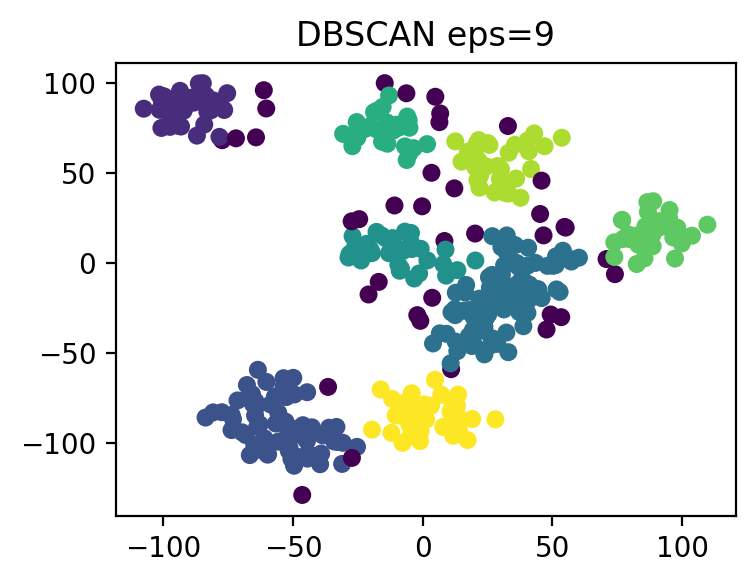

In [17]:
from sklearn.cluster import DBSCAN
chosen_eps = 9
model = DBSCAN(eps=chosen_eps)
cluster_and_show(data,model,f"DBSCAN eps={chosen_eps}")

#### Warto jednak zobaczyć jak to wygląda dla `eps=7 i eps=11`

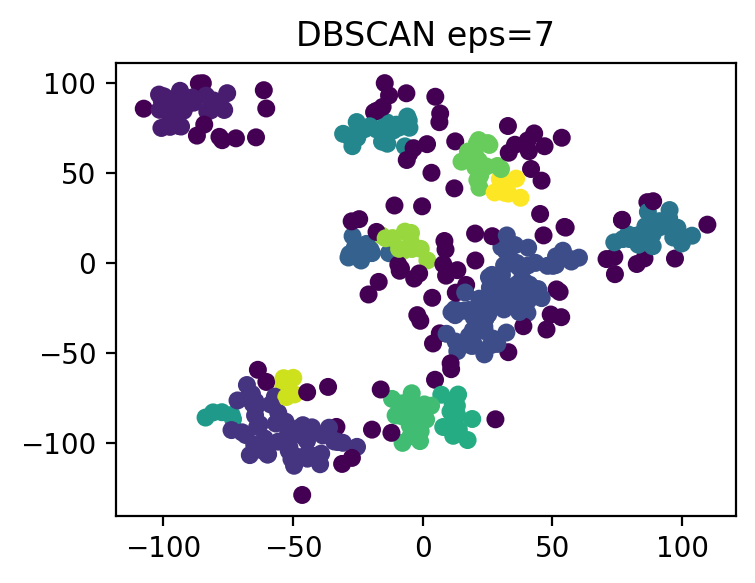

In [18]:
chosen_eps = 7
model = DBSCAN(eps=chosen_eps)
cluster_and_show(data,model,f"DBSCAN eps={chosen_eps}")

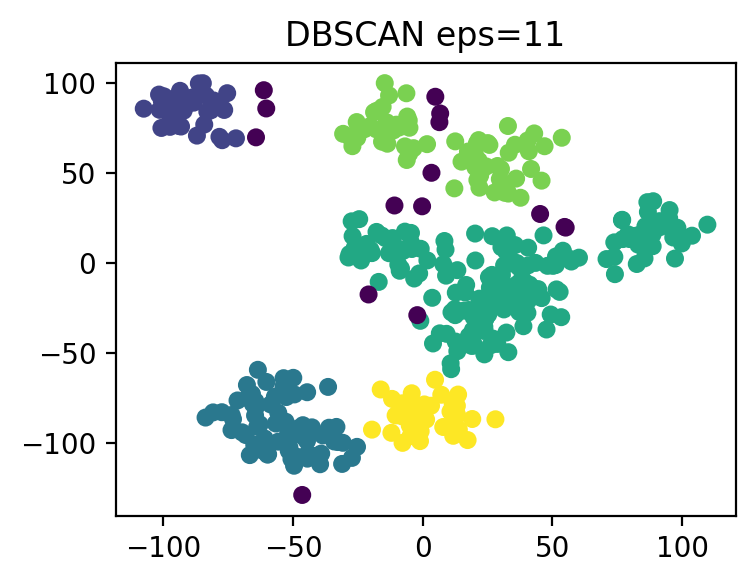

In [19]:
chosen_eps = 11
model = DBSCAN(eps=chosen_eps)
cluster_and_show(data,model,f"DBSCAN eps={chosen_eps}")

#### **K-Means**
Jest to najprostrzy z algorytmów i wymaga ręcznego podania ilości klastrów. Jak się możemy domyślić nie działa on najlepiej dla dowolnego typu danych. By to jeszcze lepiej pokazać zwizualizuje środki klastrów znalezionych przez ten algorytm.

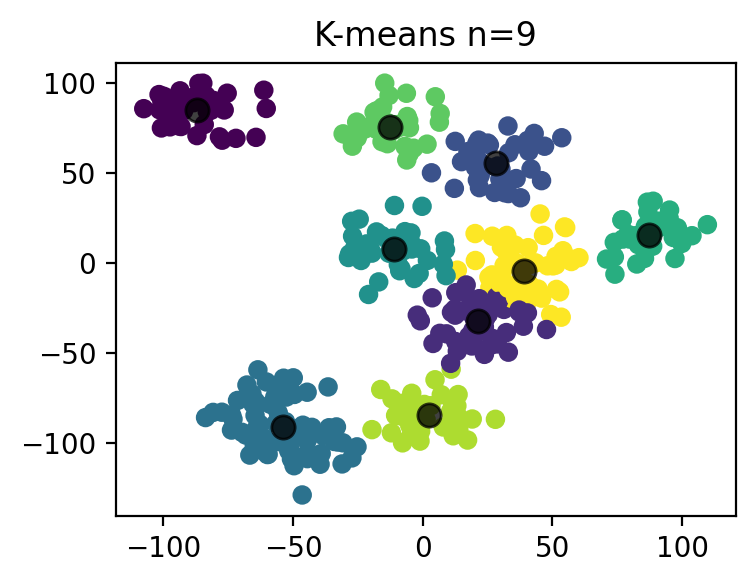

In [20]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=9, random_state=0)
predictions = model.fit_predict(data)
plt.figure(figsize=(4, 3), dpi= 200, facecolor='w', edgecolor='k')
plt.scatter(data["x"], data["y"], c=predictions)
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70, alpha=0.75)
plt.title('K-means n=9')
plt.show()

### Komentarz
Ku mojemu zdziwieniu K-Means radzi sobie w tym przypadku doskonale. Jak się jednak nad tym głębiej zastanowić, to klastry te nie nachodzą na siebie w zbyt mocnym stopniu, a co najważniejsze są mniej więcej kuliste, więc nie ma powodu by K-Means zwracał błędne wyniki. W takim razie jest on jak najbardziej dobrym wyborem w tym przypadku.

#### **Birch**
Jest to dosyć skomplikowany algorytm, który ma na celu rozwiązać problemy dużej ilości danych. Po więcej informacji przekierowuje [tutaj](https://towardsdatascience.com/machine-learning-birch-clustering-algorithm-clearly-explained-fb9838cbeed9).

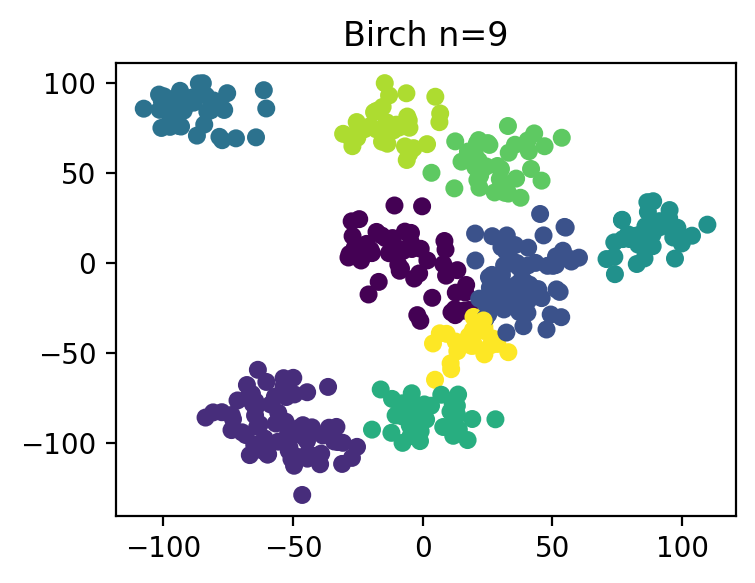

In [25]:
model = Birch(n_clusters=9)
cluster_and_show(data,model,"Birch n=9")